In [1]:
# plots

# importing libraries 

from __future__ import division
from __future__ import print_function  
import warnings
import pandas as pd
import gsp_support as gsp
import matplotlib.pyplot as plt
import numpy as np
# pd.options.plotting.backend = "plotly"
import datetime

# importing libraries for the plot

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
# read data and preprocess it
input_folder = 'FINAL/Disaggregation/stage2_filter/'
# daily = pd.read_csv(input_folder+'RP AC daily_logs 27Apr21.csv')
total = pd.read_csv(input_folder+'3 min disaggregated result FINAL with removed meters.csv')

total['x_Timestamp'] = pd.to_datetime(total['x_Timestamp'])
total = total.set_index('x_Timestamp')



In [2]:
j = 'FINAL/av_data/'

total = pd.read_csv(j+'3 min disaggregated result FINAL with removed meters Mar-Oct.csv')
total['x_Timestamp'] = pd.to_datetime(total['x_Timestamp'])
total = total.set_index('x_Timestamp')

In [5]:
total

,gsp,power,current,compressor,final_compressor,ac_power,ac_on,voltage,meter,m-y
x_Timestamp,,,,,,,,,,
2019-05-09 00:00:00,0.0,3440.0,14.74,0,1,1328.598375,1,233.66,MH24,2019-05
2019-05-09 00:03:00,0.0,2440.0,10.20,0,1,2051.372306,1,238.77,MH24,2019-05
2019-05-09 00:06:00,0.0,2420.0,10.17,0,1,2031.372306,1,239.08,MH24,2019-05
2019-05-09 00:09:00,0.0,2420.0,10.20,0,1,2031.372306,1,238.73,MH24,2019-05
2019-05-09 00:12:00,0.0,2380.0,10.00,0,1,1991.372306,1,237.68,MH24,2019-05
...,...,...,...,...,...,...,...,...,...,...
2020-10-31 23:45:00,3.0,180.0,1.02,0,0,0.000000,0,258.91,MH21,2020-10
2020-10-31 23:48:00,3.0,100.0,0.55,0,0,0.000000,0,258.19,MH21,2020-10
2020-10-31 23:51:00,3.0,220.0,1.30,0,0,0.000000,0,257.71,MH21,2020-10


In [3]:
total = total.loc[~total['meter'].isin(['BR11','BR22','BR51'])]

In [4]:
len(total['meter'].unique())

24

In [11]:
ok = total.loc[total.index.year == 2019]
ok1 = total.loc[total.index.year == 2020]

In [12]:
ok['hour'] = ok.index.hour
ok1['hour'] = ok1.index.hour

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
ok1

,gsp,power,current,compressor,final_compressor,ac_power,ac_on,voltage,meter,m-y,hour
x_Timestamp,,,,,,,,,,,
2020-03-10 00:00:00,0.0,0.0,0.00,0,0,0.0,0,0.00,MH24,2020-03,0
2020-03-10 00:03:00,0.0,0.0,0.00,0,0,0.0,0,0.00,MH24,2020-03,0
2020-03-10 00:06:00,0.0,0.0,0.00,0,0,0.0,0,0.00,MH24,2020-03,0
2020-03-10 00:09:00,0.0,0.0,0.00,0,0,0.0,0,0.00,MH24,2020-03,0
2020-03-10 00:12:00,0.0,0.0,0.00,0,0,0.0,0,0.00,MH24,2020-03,0
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 23:45:00,3.0,180.0,1.02,0,0,0.0,0,258.91,MH21,2020-10,23
2020-10-31 23:48:00,3.0,100.0,0.55,0,0,0.0,0,258.19,MH21,2020-10,23
2020-10-31 23:51:00,3.0,220.0,1.30,0,0,0.0,0,257.71,MH21,2020-10,23


In [14]:
def func(df):
    dff = df.loc[df['ac_on']==1]  
    k = df.groupby('meter').apply(func2)
    c = dff.groupby('meter').apply(func2)
    j = c/k
    j = j.dropna()
    s = (sum(j)/len(j))*100
    return s

def func2(df_):
    l = len(np.unique(df_.index.date))
    return(l)

In [39]:
ok['day'] = ((pd.DatetimeIndex(ok.index).dayofweek) // 5 == 1).astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
we = ok.loc[ok['day']==1]
wd = ok.loc[ok['day']==0]

In [17]:
for m in ['BR']:
    br = we.loc[ok['meter'].str.contains(m)]
    br_19 =br.groupby('hour').apply(func)

In [49]:
br = wd.loc[wd['meter'].str.contains(m)]
df_wd =br.groupby('hour').apply(func)

In [50]:
df_19 = pd.concat([df_wd,df_we],axis=1)
# df_20 = pd.concat([br_20,mh_20],axis=1)

In [51]:
df_19.columns = ['WD','WE']
# df_20.columns = ['Bareilly','Mathura']

In [23]:
df_19['whole'] = df_19.mean(axis=1)

In [35]:

# df_19.loc[df_19.index.isin([21,22,23,0,1,2,3,4,5])].mean()
df_19.loc[df_19.index.isin([6,7,8,9,10,11,12])].mean()

Bareilly    21.650157
Mathura     17.975121
whole       19.812639
dtype: float64

In [52]:
df_19.to_csv('')

,WD,WE
hour,,
0,49.915880,47.840049
1,48.863721,46.262628
2,41.210413,42.491783
3,36.240028,38.142289
4,31.641451,27.595905
5,27.138555,26.178708
6,20.825152,19.414179
7,19.297140,15.444711
8,22.848575,21.066622


In [37]:
df_19

,Bareilly,Mathura,whole
hour,,,
0,49.460301,69.184032,59.322167
1,48.224484,65.538951,56.881717
2,41.688217,63.288746,52.488482
3,36.846189,58.320076,47.583132
4,30.598612,53.570772,42.084692
5,26.990564,48.112835,37.551699
6,20.519515,31.606456,26.062986
7,18.239380,20.926470,19.582925
8,22.351411,14.833549,18.592480


In [54]:
df_19.to_csv('FINAL/Descriptive statistics/hourly_usage_wd_we.csv')

In [26]:
df_19.to_csv('FINAL/Descriptive statistics/hourly_usage_789-2019.csv')

In [24]:
df_19.to_csv(output_folder+'2019_hour_probability_AC_usage.csv')
df_20.to_csv(output_folder+'2020_hour_probability_AC_usage.csv')

In [23]:
output_folder = 'FINAL/hour_prob/'

In [25]:
df_19

,Bareilly,Mathura,whole
hour,,,
0,49.460301,69.184032,59.322167
1,48.224484,65.538951,56.881717
2,41.688217,63.288746,52.488482
3,36.846189,58.320076,47.583132
4,30.598612,53.570772,42.084692
5,26.990564,48.112835,37.551699
6,20.519515,31.606456,26.062986
7,18.239380,20.926470,19.582925
8,22.351411,14.833549,18.592480


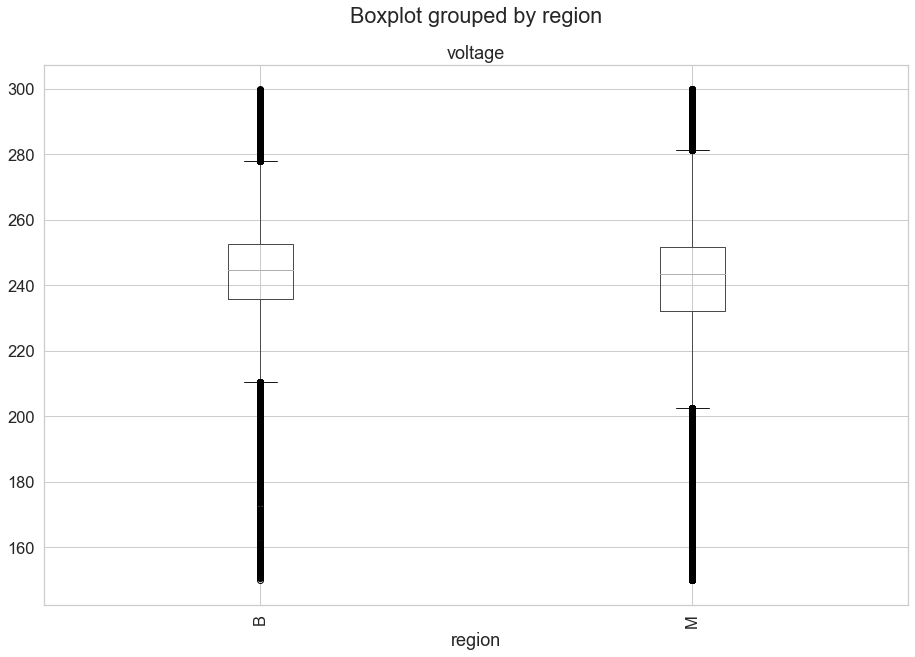

In [12]:
fig = total.boxplot(column='voltage',by='region',figsize=(15, 10),rot=90)

In [14]:
fig.figure.savefig('FINAL/Descriptive statistics/voltage.png')

In [11]:
total = total.loc[total['voltage']>150]

In [5]:
total['region'] = total['meter'].str[0:1]

In [62]:
total['voltage']

x_Timestamp
2019-05-09 00:00:00    233.66
2019-05-09 00:03:00    238.77
2019-05-09 00:06:00    239.08
2019-05-09 00:09:00    238.73
2019-05-09 00:12:00    237.68
                        ...  
2020-10-31 23:45:00    258.91
2020-10-31 23:48:00    258.19
2020-10-31 23:51:00    257.71
2020-10-31 23:54:00    257.51
2020-10-31 23:57:00    257.87
Name: voltage, Length: 3437825, dtype: float64

In [61]:
total[]

,gsp,power,current,compressor,final_compressor,ac_power,ac_on,voltage,meter,m-y,region
x_Timestamp,,,,,,,,,,,
2019-05-09 00:00:00,0.0,3440.0,14.74,0,1,1328.598375,1,233.66,MH24,2019-05,M
2019-05-09 00:03:00,0.0,2440.0,10.20,0,1,2051.372306,1,238.77,MH24,2019-05,M
2019-05-09 00:06:00,0.0,2420.0,10.17,0,1,2031.372306,1,239.08,MH24,2019-05,M
2019-05-09 00:09:00,0.0,2420.0,10.20,0,1,2031.372306,1,238.73,MH24,2019-05,M
2019-05-09 00:12:00,0.0,2380.0,10.00,0,1,1991.372306,1,237.68,MH24,2019-05,M
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 23:45:00,3.0,180.0,1.02,0,0,0.000000,0,258.91,MH21,2020-10,M
2020-10-31 23:48:00,3.0,100.0,0.55,0,0,0.000000,0,258.19,MH21,2020-10,M
2020-10-31 23:51:00,3.0,220.0,1.30,0,0,0.000000,0,257.71,MH21,2020-10,M


In [15]:
total.groupby('region')['voltage'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
B,1378651.0,243.942369,12.917723,150.12,235.81,244.83,252.66,299.87
M,1809141.0,239.022141,19.390634,150.01,232.05,243.41,251.81,299.98
